# Theory Introduction

`TorchFSM` is a Python package designed for scientific computing, leveraging the **Fourier-Spectral Method** for solving partial differential equations (PDEs). In this notebook, we would like to show you a basic theoretical background of the Fourier-Spectral Method. After reading this notebook, you will be able to understand the key idea behind `TorchFSM`.

## Spectral Method

Let's first consider a general PDE for a scalar $\phi$:

$$
\begin{matrix}
\frac{\partial \phi (\mathbf{x})}{\partial t}+\mathcal{P}(\phi(\mathbf{x}))=s(\mathbf{x}), & \mathbf{x} \in \Omega,
\\
\mathcal{B}(\phi(\mathbf{x}))=h(\mathbf{x}), & \mathbf{x} \in \partial \Omega,
\end{matrix}
$$

where $\mathcal{P}$ and $\mathcal{B}$ are spatial differential operators, $s$ and $h$ are source functions, $\Omega$ is the spatial domain with boundary of $\partial \Omega$.

In the spectral method, we use a series of trial functions $\psi_j$ to expand the original function $\phi(\mathbf{x})$ on spatial space:

$$
\phi(\mathbf{x}) = \int c_j \psi_i(\mathbf{x}) d_j.
$$

Given the trial functions $\psi_i$, solving the original PDE for the physical variable $\phi$ reduces to finding the coefficients $c_i$ that satisfy the PDE. **That is, we transform the solution domain from the physical space to the coefficient space.**

The Fourier spectral method utilizes the Fourier basis functions as the trial functions, i.e.,
$$
\phi(\mathbf{x}) = \int \hat{\phi}(\mathbf{f}) e^{2 \pi i \mathbf{f}\cdot \mathbf{x}} d\mathbf{f}.
$$
Here, $\hat{\phi}(\mathbf{f})$ with the frequency $\mathbf{f}$, as the coefficient space in our previous notation, is usually called the value of $\phi_j(\mathbf{x})$ in spectral space. The transformation from physical space to spectral space is the Fourier transformation:
$$
\mathcal{F}[\phi(\mathbf{x})] =
\hat{\phi}(\mathbf{f}) = \int \phi(\mathbf{x}) e^{-2 \pi i \mathbf{f}\cdot \mathbf{x}} d\mathbf{x},
$$
and the inverse Fourier transformation brings us back to the physical space from the spectral space:
$$
\mathcal{F}^{-1}[\hat{\phi}(\mathbf{f})] = \phi(\mathbf{x}) = \int \hat{\phi}(\mathbf{f}) e^{2 \pi i \mathbf{f}\cdot \mathbf{x}} d\mathbf{f}.
$$

The Fourier transformation assumes periodicity in the solution, meaning the solution is inherently periodic. Thus, the Fourier spectral method is usually used for problems with **periodic boundary condition**.

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>
        The trial functions of Fourier transformation are actually a series of sinusoidal functions with different wave numbers $k=H f$ where $H$ is the domain length, as $e^{i \frac{2\pi}{H}k x}=\cos \frac{2\pi}{H}kx +\sin \frac{2\pi}{H}kx$. If you are not familiar with the Fourier transformation, we can recommend <a href="https://www.youtube.com/watch?v=QmgJmh2I3Fw">this awesome video</a> for a quick introduction.
    </p>
</div>

## Linear and Nonlinear terms
With the discussion above, we can now try to transform the PDE into the spectral space with the Fourier transformation:
$$
\frac{\partial \hat{\phi}(\mathbf{f})}{\partial t}+ \mathcal{F}[\mathcal{P}(\phi(\mathbf{x}))-s(\mathbf{x})]=0.
$$
Once we can solve the above PDE, we can send the obtained solution back to the physical space through the inverse Fourier transformation. 
The key problem here turns to how to calculate the Fourier transformation of $\mathcal{P}(\phi(\mathbf{x}))-s(\mathbf{x})$. Thanks to the linear property of the Fourier transformation, $\mathcal{F}[a f(\mathbf{x})+ b g(\mathbf{x})]=a\mathcal{F}[f(\mathbf{x})]+b\mathcal{F}[g(\mathbf{x})]$, we can separate $\mathcal{P}(\phi(\mathbf{x}))-s(\mathbf{x})$ into different terms and calculate their Fourier transformation according to their properties.
### Linear terms
Linear terms refer to the terms that can be written as $L \hat{\phi}(\mathbf{f})$ where $L$ is a coefficient function independent of $\hat{\phi}(\mathbf{f})$. It not only includes the simple source terms, e.g., $L \phi(x)$, but also the **spatial differential operators**, e.g., $\nabla \phi(\mathbf{x})$, $\nabla^2 \phi(\mathbf{x})$, etc. This is due to the derivative property of the Fourier transformation:
$$
\mathcal{F}[\frac{d^n \phi(\mathbf{x})}{d\mathbf{x}^n}]= (2\pi i \mathbf{f})^n \hat{\phi}(\mathbf{f})
$$
For example, the Fourier transformation of $\nabla \phi (\mathbf{x})=[\partial \phi/\partial x, \partial \phi/\partial y, \cdots]^\top$ is $\mathcal{F}[\nabla \phi (\mathbf{x})]=[2\pi i f_x, 2\pi i f_y, \cdots]^\top \hat{\phi}(\mathbf{f})$.

Below is a simple example demonstrating how to use the Fourier transformation to calculate derivatives:

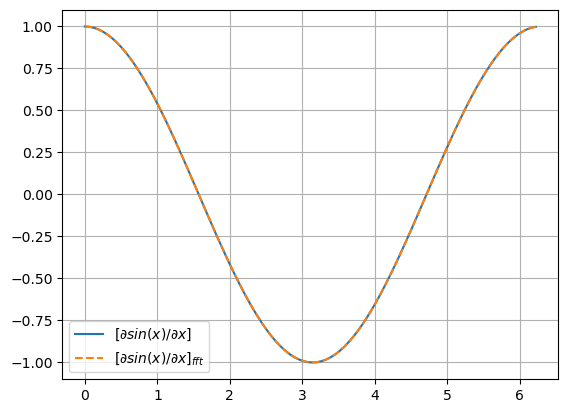

In [ ]:
# Fourier transformation of sin(x) and its derivative
import numpy as np
import matplotlib.pyplot as plt

# set the grid
L=np.pi*2
N=100
d=L/N
grid=np.arange(0,L,d)
sinx=np.sin(grid)
# ground truth of the sin'(x)
cosx=np.cos(grid)
# transform sin(x) to fourier space
sinx_fft=np.fft.fft(sinx)
# calculate the derivative of sin(x) in fourier space
dsinx_dx=2*np.pi*1j*np.fft.fftfreq(N,d)*sinx_fft
# transform back to real space
dsinx_dx=np.fft.ifft(dsinx_dx).real
# plot the result
plt.plot(grid,cosx,
         label='$[\partial sin(x) / \partial x ]$')
plt.plot(grid,dsinx_dx,
         label='$[\partial sin(x) / \partial x ]_{fft}$',
         linestyle='--')
plt.legend()
plt.grid()
plt.show()

This also provides a very simple way to solve some time-independent PDEs with only linear terms, e.g., the Poisson's equation $\nabla^2 \phi(\mathbf{x})=s(\mathbf{x})$:

$$
\phi(\mathbf{x}) = \mathcal{F}^{-1}[\frac{\mathcal{F}[s(\mathbf{x})]}{(2\pi i \mathbf{f})^2}].
$$

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>
        When using the Fourier transformation to solve equations like Poisson's equation, we need to be careful with the zero division problem. In the above example, we need to pad the value artificially when $\mathbf{f} = \mathbf{0}$. The zero frequency component is usually called the DC component, which is the average value of the function. The derivation operation will eliminate the DC component in a signal (the average value of a field will not affect any derivative of this value), so we need to pad the DC component artificially when doing the inverse operation.
    </p>
</div>

Usually, Poisson's equation is difficult and expensive to solve in the physical space, but it is very easy to solve in the spectral space. 

Calculating the derivatives easily in the spectral space is one of the most important advantages of the Fourier spectral method.

### NonLinear terms
Nonlinear terms refer to the terms that can not be written as $L \hat{\phi}(\mathbf{f})$. In physical space, the nonlinear terms are usually terms with the product of two or more functions dependent on $\mathbf{x}$, e.g., $\phi^2(\mathbf{x})$, $\nabla \phi(\mathbf{x}) \cdot \nabla \phi(\mathbf{x})$, etc. In the spectral space, the Fourier transformation of the product can be calculated by the convolution theorem:
$$
\mathcal{F}[f(\mathbf{x})g(\mathbf{x})]=\mathcal{F}[f(\mathbf{x})]*\mathcal{F}[g(\mathbf{x})],
$$
where $*$ denotes the convolution operation. However, the convolution operation is usually very expensive. Thus, we usually calculate the nonlinear terms in the physical space and then transform them back into the spectral space. For example, the Fourier transformation of $\nabla \phi(\mathbf{x}) \cdot \nabla \phi(\mathbf{x})$ is:
$$
\mathcal{F}[\nabla \phi(\mathbf{x}) \cdot \nabla \phi(\mathbf{x})]=\mathcal{F}[\mathcal{F}^{-1}[
[2\pi i f_x, 2\pi i f_y, \cdots]^\top \hat{\phi}(\mathbf{f})
]^2]
$$

Solving nonlinear terms back to the physical space is why the Fourier spectral method is usually called a **pseudo-spectral method** as not all operations are done in the spectral space.

## Time integration
With the definition of the linear and nonlinear terms, we can turn the original PDE into the spectral space as:
$$
\frac{\partial \hat{\phi}(\mathbf{f})}{\partial t}=L \hat{\phi}(\mathbf{f})+ N(\hat{\phi}(\mathbf{f}))
$$
where $L$ is the linear coefficient and $N$ is the nonlinear function. The PDE is now transformed into a system of ODEs, which means we can use the ODE solvers, e.g., Euler and Runge-Kutta, to integrate the ODEs in time to get the solution of the PDE. However, in the Fourier spectral method, other groups of methods utilize the different features of linear and nonlinear terms to provide a better integration for the ODE. This kind of method is usually known as **Exponential Time Differencing Runge-Kutta (ETDRK)** method.

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>
        We will not discuss the details of the ETDRK method in this notebook. If you are interested in this topic, you can refer to the following papers:
    </p>
    <p>
        [1] Cox, Steven M., and Paul C. Matthews. "Exponential time differencing for stiff systems." Journal of Computational Physics 176.2 (2002): 430-455.
    </p>
    <p>
        [2] Kassam, Aly-Khan, and Lloyd N. Trefethen. "Fourth-order time-stepping for stiff PDEs." SIAM Journal on Scientific Computing 26.4 (2005): 1214-1233.
    </p>
</div>

In `TorchFSM`, the default time integration method is the ETDRK method (a stable version of ETDRK, specifically). But traditional ODE solvers are also provided for users to choose. Details of the integration methods can be found in the [tutorials](../tutorials/simulation/advanced_tech/choose_integrator/).

## Discretization and Aliasing error
### Aliasing error

Directly calculating the accurate and inverse Fourier transformations could be tricky and expensive. Thus, we usually perform a discrete Fourier transformation on a series of grid points. In a simple 1d mesh with $N$ grid points, the discrete Fourier transformation is:

$$\hat{\phi}_k = \sum_{j=0}^{N-1} \phi_j e^{-2\pi i j k/N}$$

where $k$ is the wave number and $j$​ is the grid index. The Fast Fourier Transformation (FFT) algorithm can efficiently calculate the discrete Fourier transformation.

Similar to truncation errors in the finite difference method, the Fourier spectral method is subject to **aliasing errors** caused by discretization. The source of aliasing errors is the fact that a mesh with a certain number of nodes can only accurately resolve signals with frequencies below a certain threshold. Let's explain this point through a very simple configuration. Consider a 1d mesh with  $N$ mesh grids and the domain length of $2\pi$ so that we can simply give a periodic field $\sin (kx)$ with different wavenumber $k$, i.e., different frequency. Then, the location of the $j$th grid point would be $2\pi j/N$. Now, let's consider two sinusoidal fields with wave numbers of $k_1$ and $k_2$. Then, the value at $j$th grid point would be

$$
\phi_{j,k_1}=\sin( 2\pi j k_1/N)
$$

and

$$
\phi_{j,k_2}=\sin( 2\pi j k_2/N)=\sin[ 2\pi j k_1/N+2\pi j (k_2-k_1)/N]
$$

Since $j=0,1,\cdots N-1$, we can obtain that

$$
\begin{matrix}
\phi_{j,k_1}=-\phi_{j,k_2}, & \text{if}  & j(k_2-k_1) \in [\frac{N}{2},\frac{3N}{2},\frac{5N}{2}, \cdots]
\\
\phi_{j,k_1}=\phi_{j,k_2}, & \text{if}  & j(k_2-k_1) \in [N,2N,3N, \cdots]
\end{matrix}
$$

So, if you have $k_2 \geq \frac{N}{2}$, you can always find a $k_1$ between $[0, \frac{N}{2})$ to make $k_2-k_1$ satisfy one of the above conditions. This conclusion shows that, actually, **the largest wave number that a discrete grid can resolve is $N/2$** (corresponding to [Nyquist frequency](https://en.wikipedia.org/wiki/Nyquist_rate)). Any signal has a wavenumber larger or equal to $N/2$ will overlap to a signal whose wavenumber is smaller than $N/2$. We can use a simple code example to illustrate this point:

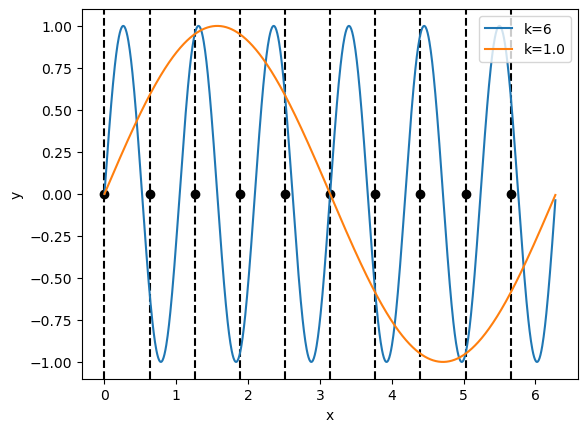

The field with wave number 6 is overlapped with the field with wave number 1.0.
The difference between the two fields on the grid point is -6.283205978117934e-06


In [ ]:
L=np.pi*2
N=10
k1=6
assert k1 >= N/2, 'No aliasing error occurs if k < N/2'
k2 = k1 % (N/2)
grid=np.arange(0,L,L/N)
# plot the grid
plt.scatter(grid,
            np.zeros_like(grid),
            c="black")
for x in grid:
    plt.axvline(x = x, 
                color = "black", 
                linestyle = "--")
# plot the sin wave with k1 and k2
x=np.arange(0,L,L/N*0.01)
y1=np.sin(k1*x)
y2=np.sin(k2*x)
plt.plot(x,y1,label=f'k={k1}')
plt.plot(x,y2,label=f'k={k2}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f"The field with wave number {k1} is overlapped with the field with wave number {k2}.")
print(f"The difference between the two fields on the grid point is {np.mean(np.abs(y1)-np.abs(y2))}")

In the above example, the values of $\sin(k_1 x)$ and $\sin(k_2 x)$ are the same or opposite at each grid point, i.e., they overlap. If we look back at the formula of discrete Fourier transformation, we will find out why this overlap is important. If we have a field that contains some low-frequency signals with wave number $k_1$ and high-frequency signals with wave number $k_2$ and they overlap each other, you will not able to calculate $\hat{\phi}_{k_1}$ accurately as both of them will contribute to the $\phi_j$ in each grid point $j$. In the simulations, that means the low-frequency component of your field will be affected by the unresolved high-frequency component, which is the [aliasing error](https://en.wikipedia.org/wiki/Aliasing).


We can use another example to further illustrate the aliasing error. Like the first case, we calculate the spatial derivative with Fourier Transformation. The difference here compared with the previous case is that we can control the wave number of the signal. You can find that only when $k < N/2$, the Fourier Transformation can produce the correct result.

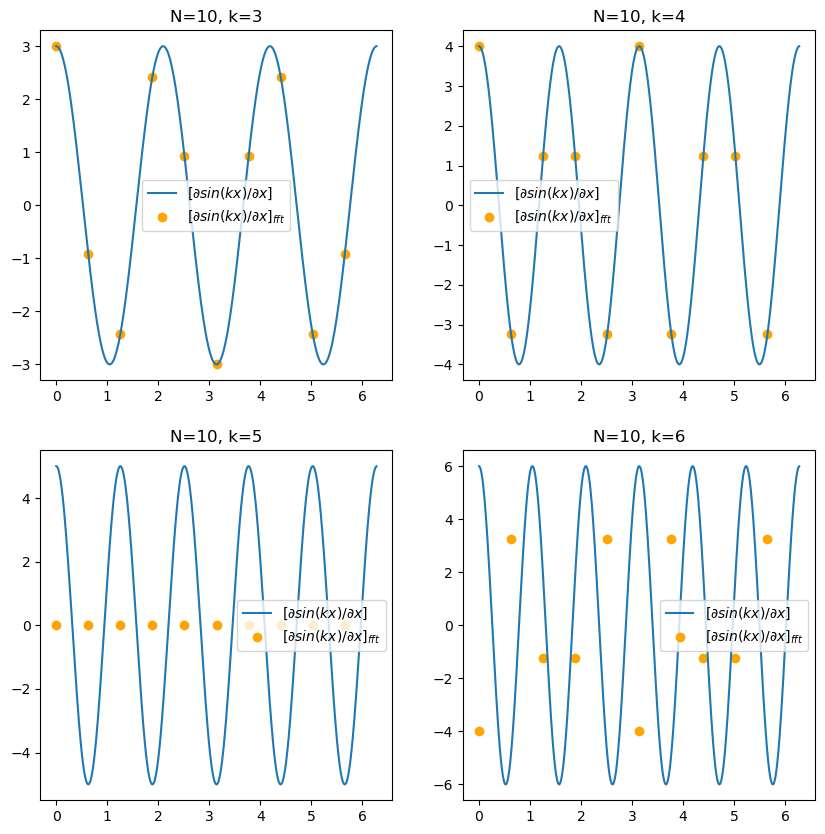

In [4]:
def show_aliasing(N:int,k:int,ax=None): 
    # k need to be integer as the FFT will only consider the integer k
    L=np.pi*2
    d=L/N
    grid=np.arange(0,L,d)
    x=np.arange(0,L,0.01*d)
    # sin(kx)
    sinkx=np.sin(k*grid)
    # ground truth of the sin'(kx)
    kcoskx=k*np.cos(k*x)
    # calculate the derivative of sin(kx) in fourier space
    sinkx_fft=np.fft.fft(sinkx)
    dsinkx_dx=np.fft.ifft(2*np.pi*1j*np.fft.fftfreq(N,d)*sinkx_fft).real
    if ax is None:
        ax=plt.gca()
    ax.plot(x,kcoskx,
            label='$[\partial sin(kx) / \partial x ]$')
    ax.scatter(grid,dsinkx_dx,
               label='$[\partial sin(kx) / \partial x ]_{fft}$',
               color='orange')
    ax.set_title(f'N={N}, k={k}')
    ax.legend()
fig,axs=plt.subplots(2,2,figsize=(10,10))
axs=axs.flatten()
for i,k in enumerate([3,4,5,6]):
    show_aliasing(10,k,ax=axs[i])

Aliasing errors are particularly significant in nonlinear terms. As the nonlinear terms usually contain the product of two or more fields, the result of the product will contain higher frequency components. For example, if we calculate the square of the field $\sin(kx)$, the result field is $\frac{1-\cos(2kx)}{2}$, which has two times the frequency of the original field. This means that the aliasing error will be more severe in the nonlinear terms. We can also illustrate this point with a simple example where we calculate the derivative of $\sin^2(kx)$, and you will find the wave number threshold for the aliasing error is $k < N/4$ due to the doubled wave number after the nonlinear operation.

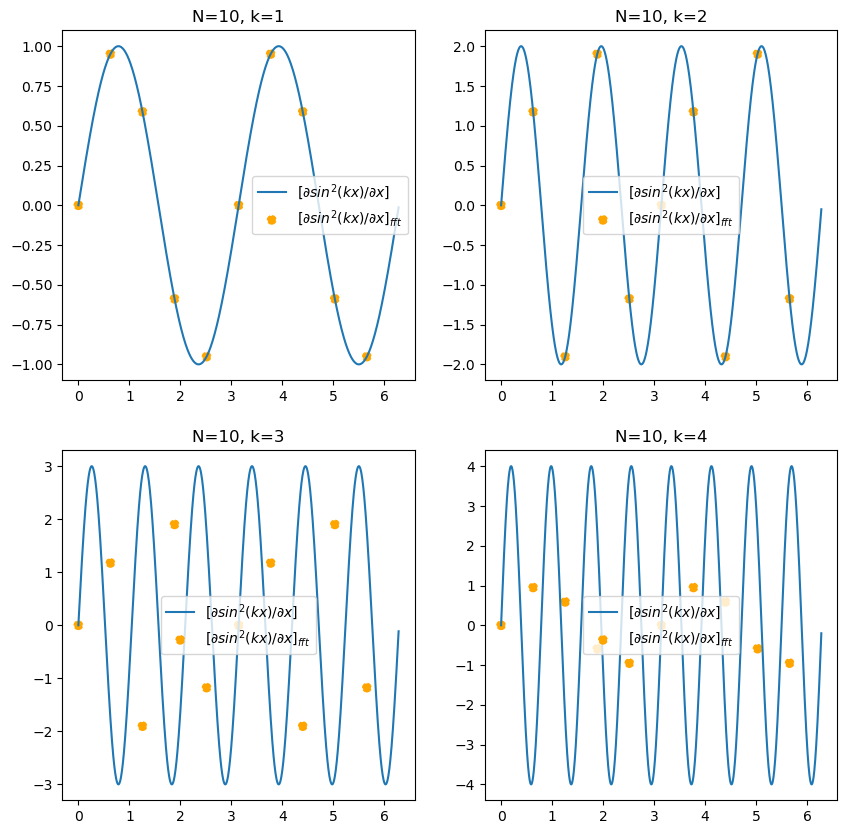

In [5]:
def show_aliasing_nonlinear(N:int,k:int,ax=None): 
    # k need to be integer as the FFT will only consider the integer k
    L=np.pi*2
    d=L/N
    grid=np.arange(0,L,d)
    x=np.arange(0,L,d*0.01)
    y=np.sin(k*grid)**2
    # ground truth of the d sin^2(kx)/dx
    gd=2*k*np.sin(k*x)*np.cos(k*x)
    # calculate the derivative of sin^2(kx) in fourier space
    yy_fft=np.fft.fft(y)
    fft=np.fft.ifft(2*np.pi*1j*np.fft.fftfreq(N,d)*yy_fft).real
    if ax is None:
        ax=plt.gca()
    ax.plot(x,gd,
            label='$[\partial sin^2(kx) / \partial x ]$')
    ax.scatter(grid,fft,
               label='$[\partial sin^2(kx) / \partial x ]_{fft}$',linestyle='--',color="orange")
    ax.legend()
    ax.set_title(f'N={N}, k={k}')
fig,axs=plt.subplots(2,2,figsize=(10,10))
axs=axs.flatten()
for i,k in enumerate([1,2,3,4]):
    show_aliasing_nonlinear(10,k,ax=axs[i])

### De-aliasing

To reduce the aliasing error, we can use the so-called **de-aliasing** technique.

We need to point out first that the only available way to resolve the high-frequency field is to increase the number of grid points $N$. For example, you can never accurately $\partial sin(6x) / \partial x$ correctly with only 10 grid points using Fourier Transformation. The "reducing aliasing errorS" actually refers to a situation where the grid points can resolve the original field, but the new field generated by the nonlinear terms can not. Sounds a little bit confusing? Let's take an example. 

Considering that if we still have 10 grid points and the target field is $\sin(2x)+\sin(4x)$. The grid can resolve this field as the wave number of both fields is smaller than the threshold $N/2=5$. However, if we apply a nonlinear operator, e.g., $(\sin(2x)+\sin(4x))^2=\sin^2(2x)+sin^2(4x)+2*sin(2x)*sin(4x)$, you will find that actually the later two components in the result can not be resolved by the grid points. You may think it is fine since the high-frequency components can not be resolved, and we can just drop them. However, as we have discussed before, the high-frequency components will overlap with the low-frequency components and contaminate the low-frequency components. That means the unresolved high-frequency components will affect the low-frequency components, which we should resolve accurately with the grid points. This is the aliasing error we are talking about. 

So, the aim of de-aliasing is to prevent the high-frequency components generated by the nonlinear terms from overlapping with the low-frequency components, which we are supposed to calculate accurately. The simplest approach is to filter out modes with frequencies exceeding the threshold $N/2$ after nonlinear operations. One of the most common techniques is the **2/3 rule**, which filters out all modes with wave numbers larger than $2/3$ of the threshold $N/2$, i.e., $k>N/3$. 

We can use some code to illustrate how the 2/3 rule works with the example we discussed above:

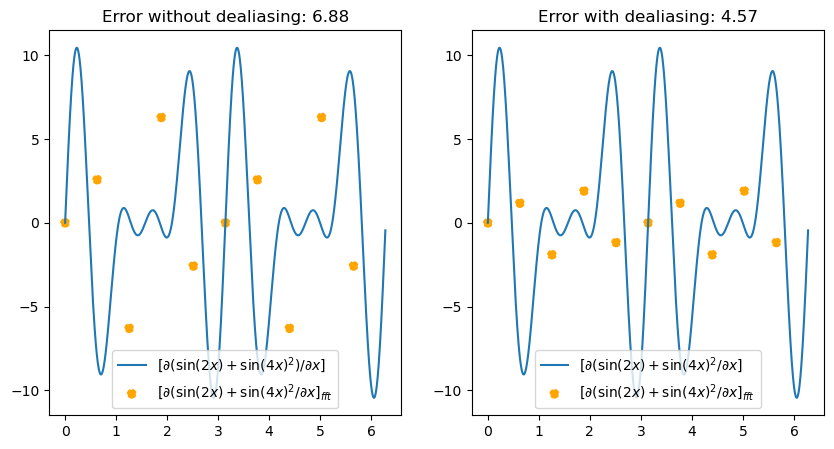

In [ ]:
# Apply the 2/3 rule to filter out high-frequency components
N=10
L=np.pi*2
d=L/N
grid=np.arange(0,L,d)
x=np.arange(0,L,d*0.01)
y=np.sin(2*grid)+np.sin(4*grid)
# ground truth of the d [sin(2x)+sin(4x)]^2/dx
gd=(np.sin(2*x) + 
    np.sin(4*x))*(4*np.cos(2*x) + 
    8*np.cos(4*x))
# ground truth at the grid point
gd_test=(np.sin(2*grid) + 
         np.sin(4*grid))*(4*np.cos(2*grid) + 
        8*np.cos(4*grid))
# calculate the derivative in fourier space
y_freq=np.fft.fftfreq(N,d)
yy_fft=np.fft.fft(y**2)
fft=np.fft.ifft(2*np.pi*1j*y_freq*yy_fft).real
fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].plot(x,gd,label='$[\partial (\sin(2x)+\sin(4x)^2) / \partial x ]$')
axs[0].scatter(grid,fft,
               label='$[\partial (\sin(2x)+\sin(4x)^2 / \partial x ]_{fft}$',
               linestyle='--',color="orange")
axs[0].legend()
axs[0].set_title('Error without dealiasing: {:.2f}'.format(np.mean(np.abs(gd_test-fft))))

# calculate the derivative in fourier space with dealiasing
wave_number_fft=np.abs(y_freq*L)
mask=np.where(wave_number_fft>N/3,0,1)
y_masked=np.fft.ifft(np.fft.fft(y)*mask).real
yy_fft=np.fft.fft(y_masked**2)
fft=np.fft.ifft(2*np.pi*1j*y_freq*yy_fft).real
axs[1].plot(x,
            gd,
            label='$[\partial (\sin(2x)+\sin(4x)^2 / \partial x ]$')
axs[1].scatter(grid,
               fft,
               label='$[\partial (\sin(2x)+\sin(4x)^2 / \partial x ]_{fft}$',
               linestyle='--',
               color="orange")
axs[1].legend()
axs[1].set_title('Error with dealiasing: {:.2f}'.format(
    np.mean(np.abs(gd_test-fft))
    ))
plt.show()

As the result shows, the de-aliasing does reduce the error. However, it still provides a very rough approximation of the correct result due to the dropped high-frequency components. In the `TorchFSM`, we use this $2/3$ rule by default. 

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>
        De-aliasing is an important and necessary technique in the Fourier spectral method, and there are many other advanced de-aliasing techniques, we would recommend the following references for more information:
    </p>
    <p>
        [1] Steven A. Orszag. "On the Elimination of Aliasing in Finite-Difference Schemes by Filtering High-Wavenumber Components." Journal of the Atmospheric Sciences 28.6 (1971): 1074.
    </p>
    <p>
        [2] John C. Bowman. “How Important is Dealiasing for Turbulence Simulations?” (online slides: http://helper.ipam.ucla.edu/publications/mtws1/mtws1 12187.pdf). University of Alberta (2014)
    </p>
</div>

For now, we have introduced some basic theories on the Fourier Spectral method related to `TorchFSM`. With all these concepts, we can start to utilize `TorchFSM` to solve PDE problems.